In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv("email.csv")
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.shape

(5572, 2)

In [11]:
data['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [21]:
print(data.columns)

Index(['label', 'text'], dtype='object')


In [23]:
data['label'].value_counts()


label
ham     4825
spam     747
Name: count, dtype: int64

In [25]:
import seaborn as sns

<Axes: xlabel='count', ylabel='label'>

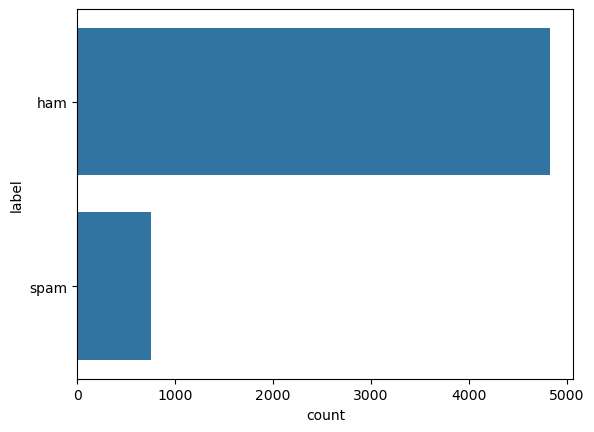

In [33]:
sns.countplot(data['label'])

In [41]:
x = data['text'].values
y = data['label'].values 

In [43]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state= 0)

In [49]:
x_train.shape

(4457,)

In [51]:
x_test.shape

(1115,)

In [53]:
y_train.shape

(4457,)

In [55]:
y_test.shape

(1115,)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
cv = CountVectorizer()

In [61]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
nb = MultinomialNB()

In [63]:
pipe = make_pipeline(cv,nb)

In [65]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [67]:
y_pred = pipe.predict(x_test)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9874439461883409

In [71]:
email = ['Hey i am elon musk. get a new brand car from tesla']
pipe.predict(email)

array(['ham'], dtype='<U4')

In [73]:
import pickle
pickle.dump(pipe, open("Naive_model.pkl", 'wb'))